# Parameters and import data

In [1]:
# General import 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random 

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

#sklearn import
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV



# figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns


In [2]:
# parameters
n_eye_positions = 25
subject = 'sub-001'

# defind data directory 
project_dir = '/home/ulascombes/disks/meso_shared/gaze_exp'
pp_dir = '{}/derivatives/pp_data'.format(project_dir)
df_fn = "{}/{}/desu".format(pp_dir,subject)

# tsv names
df_name_GazeLines ='df_task_GazeLines_runs.tsv'
df_name_GazeColumns ='df_task_GazeColumns_runs.tsv'

# import datas 
df_gazelines =pd.read_table('{}/{}'.format(df_fn,df_name_GazeLines))
df_gazecolumns =pd.read_table('{}/{}'.format(df_fn,df_name_GazeColumns))

### drop 3 first TRs
df_gazelines = df_gazelines.drop(df_gazelines.index[:3]).reset_index(drop=True)
df_gazecolumns = df_gazecolumns.drop(df_gazecolumns.index[:3]).reset_index(drop=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ulascombes/disks/meso_shared/gaze_exp/derivatives/pp_data/sub-001/desu/df_task_GazeLines_runs.tsv'

In [3]:
df_gazelines.shape

(194, 9460)

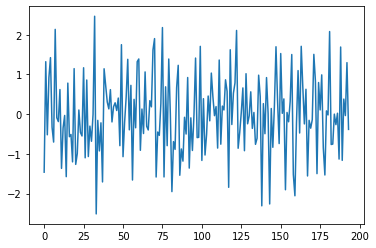

In [4]:
plt.plot(df_gazelines.index, df_gazelines['9000'])

In [5]:
gazelines_position

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,
       18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 24,
       24, 23, 23, 22, 22, 21, 21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16,
       15, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,
        7,  6,  6,  5,  5,  4,  4,  3,  3,  2,  2,  1,  1,  2,  2,  3,  3,
        4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 10, 10, 11, 11, 12,
       12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20,
       21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 24, 24, 23, 23, 22, 22, 21,
       21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 14, 14, 13, 13,
       12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,  7,  6,  6,  5,  5,  4,
        4,  3,  3,  2,  2,  1,  1])

# Make an object with eye poisitions on gazelines runs

In [3]:
positions = []
for i in range(n_eye_positions):
    a = i +1
    b = i +1
    positions.append(a)
    positions.append(b)
positions_reverse = sorted(positions, reverse=True)

positions_0 = np.concatenate((positions,positions_reverse[2:]))
gazelines_position = np.concatenate((positions_0,positions_0[2:]))

In [6]:
gazelines_position

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,
       18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 24,
       24, 23, 23, 22, 22, 21, 21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16,
       15, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,
        7,  6,  6,  5,  5,  4,  4,  3,  3,  2,  2,  1,  1,  2,  2,  3,  3,
        4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 10, 10, 11, 11, 12,
       12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20,
       21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 24, 24, 23, 23, 22, 22, 21,
       21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 14, 14, 13, 13,
       12, 12, 11, 11, 10, 10,  9,  9,  8,  8,  7,  7,  6,  6,  5,  5,  4,
        4,  3,  3,  2,  2,  1,  1])

# Make an object with eye poisitions on gazecolumns runs

In [6]:
columns_positions = [1,1,10,10,11,11,20,20,21,21,
                     22,22,19,19,12,12,9,9,2,2,
                     3,3,8,8,13,13,18,18,23,23,
                     24,24,17,17,14,14,7,7,4,4,
                     5,5,6,6,15,15,16,16,25,25]
                         
                        
                         
                         

columns_positions_reverse = sorted(columns_positions, reverse=True)

columns_positions_0 = np.concatenate((columns_positions,columns_positions_reverse[2:]))
gazecolumns_position = np.concatenate((columns_positions_0,columns_positions_0[2:]))
                        

# Concate gazelines and gaze columns in axis =0 

In [20]:
df_gaze_tot = pd.concat([df_gazelines,df_gazecolumns],axis=0).reset_index()

In [14]:
df_gaze_tot.shape

(388, 9461)

In [19]:
total_position = np.concatenate([gazelines_position,gazecolumns_position],axis=0)

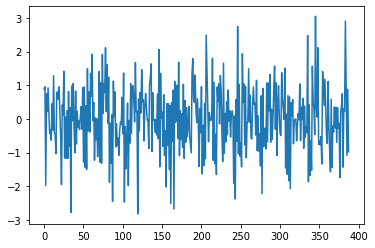

In [21]:
plt.plot(df_gaze_tot.index, df_gaze_tot['900'])

# Decode position

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_gaze_tot, total_position,stratify=total_position, test_size=0.1, random_state=42)

# Brouillon

## check how many time each position is fixe

In [7]:
valeurs_uniques, comptages = np.unique(gazelines_position, return_counts=True)

In [8]:
print(valeurs_uniques)
print(comptages)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[6 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4]


position 1 and 25 are note fixed with the same number of the others, we will exluded them 

## make a final array 


In [9]:
# make a data frame excluding position 1 and 25 
a = df_gazelines
a.index = gazelines_position
df_sorted = a.sort_index()
df = df_sorted.drop(index=[1,25])

In [10]:
positions = np.arange(2,25)
positions_to_keep = [2,5,20,24]

In [11]:
# make an empty final array with de good dimentions 
n_positions = 23 - len(positions_to_keep)
n_repetition = 8 
n_voxel = df.shape[1]
final_array = np.empty((n_voxel,n_repetition, n_positions))

In [12]:
final_array.shape

(9460, 8, 19)

In [13]:
# feel the final array 
a = 0 
for t,position in enumerate(positions) :
    if position not in positions_to_keep :
        a = a + 1  
        row  = df.loc[df.index == int(position)].T
        final_array[:, :,a-1 ] = row.values

In [14]:
final_array.shape

(9460, 8, 19)

### Vérifier le passage en 3D

In [15]:
a = df.loc[df.index == 3].T

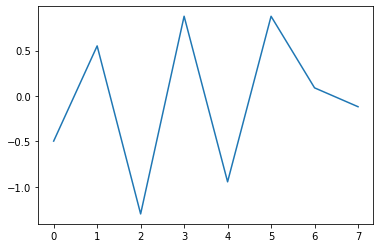

In [16]:
plt.plot(a.iloc[0, :].values)  # Tracer la première ligne de "a"
plt.show()

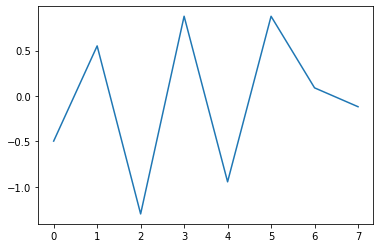

In [17]:
plt.plot(final_array[0,:,0])

## Machine Learning

étapes : <br>
garder 4 positions <br>
refaire matrice <br>
boucler sur les arbre qui ne voient quune position [:,:,t] <br>
mettre le gread search avec refit = True (défaut) <br>
stocker le meilleur model dans dictionaire (Hs.best_estimator_) <br>
fair une fonction qui récupère ça <br>


premier : insgancier le modèle avant la boucle 
ou optimiser pour chacun 

In [103]:
n_voxels = final_array.shape[0]

# make train labels
labels_train = np.zeros(n_positions)
a = 0
for t,position in enumerate(positions) :
    if position not in positions_to_keep :
        a = a + 1
        labels_train[a-1]= position
        
labels_train = labels_train.reshape(1,19)
labels_train = np.tile(labels_train, (n_voxels,1))

In [104]:
# make test labels
n_positions_to_keep = len(positions_to_keep)
labels_test = np.zeros(n_positions_to_keep)
a = 0
for t,position in enumerate(positions_to_keep) :
    a = a + 1
    labels_test[a-1]= position
        
labels_test = labels_test.reshape(1,n_positions_to_keep)
labels_test = np.tile(labels_test, (n_voxels,1))

In [105]:
# make test features
n_repetition = 8 
n_voxel = df.shape[1]
features_test = np.empty((n_voxel,n_repetition, n_positions_to_keep))

a = 0 
for t,position in enumerate(positions_to_keep) :
        a = a + 1  
        row  = df.loc[df.index == int(position)].T
        features_test[:, :,a-1 ] = row.values

In [74]:
features_test.shape

(9460, 8, 4)

In [106]:
# make train features
features_train = final_array.copy()

In [107]:
# defind param for GridSearchCV
param_grid = {
"max_depth": (2,3,4),
"min_samples_split": [1,2,3]
 }

In [108]:
model_num = []
for t in range(n_positions) : 
    model_num.append(t)
    

In [109]:
model_num

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [123]:
### in worging 
model_num = []
model_perf = []

for t in range(n_positions):
    model = DecisionTreeClassifier(random_state=42)
    search = GridSearchCV(model, param_grid, refit=True, cv=5)
    search.fit(features_train[:,:,t], labels_train[:,t])    
    model_num.append(t)
    model_perf.append(search)


In [128]:
n_models = len(model_perf)
predictions = []
for p in range(n_positions_to_keep):
    for t in range(n_models):
        prediction = model_perf[t].best_estimator_.predict(features_test[:,:,p])
        predictions.append(prediction)

In [132]:
np.shape(predictions)

(76, 9460)

In [133]:
predictions

[array([3., 3., 3., ..., 3., 3., 3.]),
 array([4., 4., 4., ..., 4., 4., 4.]),
 array([6., 6., 6., ..., 6., 6., 6.]),
 array([7., 7., 7., ..., 7., 7., 7.]),
 array([8., 8., 8., ..., 8., 8., 8.]),
 array([9., 9., 9., ..., 9., 9., 9.]),
 array([10., 10., 10., ..., 10., 10., 10.]),
 array([11., 11., 11., ..., 11., 11., 11.]),
 array([12., 12., 12., ..., 12., 12., 12.]),
 array([13., 13., 13., ..., 13., 13., 13.]),
 array([14., 14., 14., ..., 14., 14., 14.]),
 array([15., 15., 15., ..., 15., 15., 15.]),
 array([16., 16., 16., ..., 16., 16., 16.]),
 array([17., 17., 17., ..., 17., 17., 17.]),
 array([18., 18., 18., ..., 18., 18., 18.]),
 array([19., 19., 19., ..., 19., 19., 19.]),
 array([21., 21., 21., ..., 21., 21., 21.]),
 array([22., 22., 22., ..., 22., 22., 22.]),
 array([23., 23., 23., ..., 23., 23., 23.]),
 array([3., 3., 3., ..., 3., 3., 3.]),
 array([4., 4., 4., ..., 4., 4., 4.]),
 array([6., 6., 6., ..., 6., 6., 6.]),
 array([7., 7., 7., ..., 7., 7., 7.]),
 array([8., 8., 8., ..., 

In [101]:
labels_test[:,0]

TypeError: list indices must be integers or slices, not tuple